<a href="https://colab.research.google.com/github/szykry/CVML_HW/blob/Ricsi/automata_depth_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework



In [0]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

NameError: ignored

# Tradition



In [4]:
#******************INIT*******************
!pip install -U torch torchvision numpy opencv-python



# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip


!git clone https://github.com/szykry/CVML_HW.git

# Set root folder
import os
name = "/content/HW/"
os.chdir(name)
!pwd

 #OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#*******************END OF INIT*************

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.2.0.34)
--2020-05-23 15:15:20--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14446460 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[===================>]  13.78M  9.69MB/s    in 1.4s    

2020-05-23 15:15:23 (9.69 MB/s) - ‘HW.zip’ saved [14446460/14446460]

replace HW/annotations.pickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
--2020-05-23 15:15:32--  http://deeplearning.

In [0]:
# Get all subfolders in a directory
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]

In [0]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.extension"))

NameError: ignored

In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

76
474
300
217
422


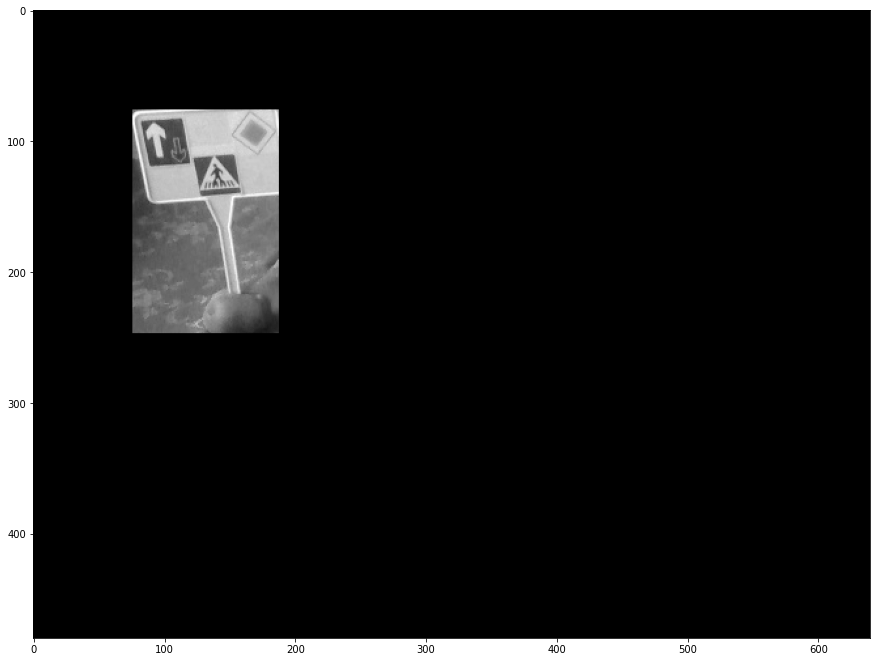

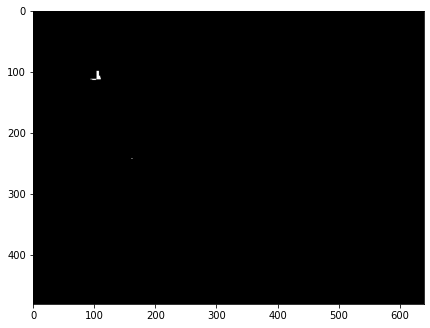

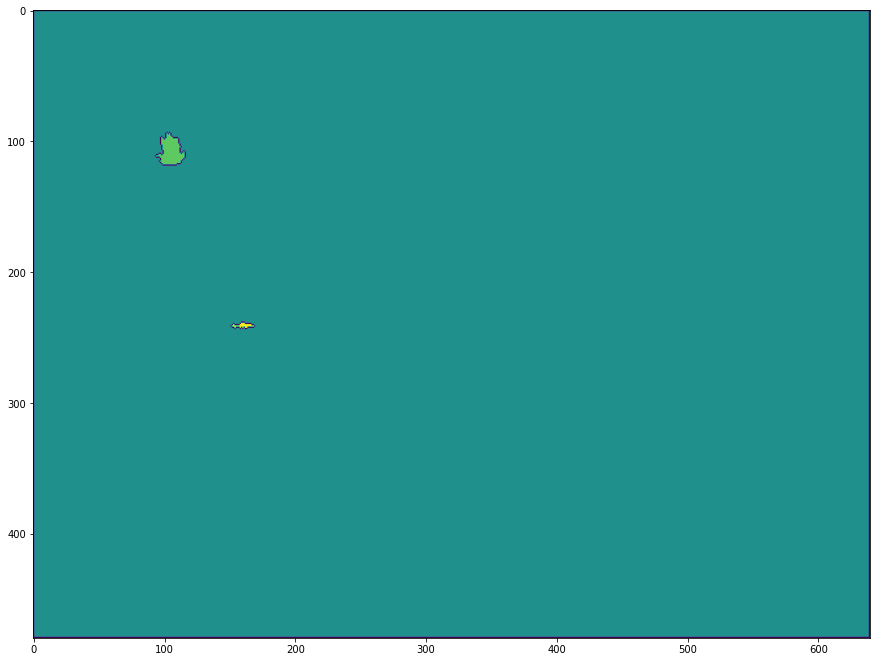

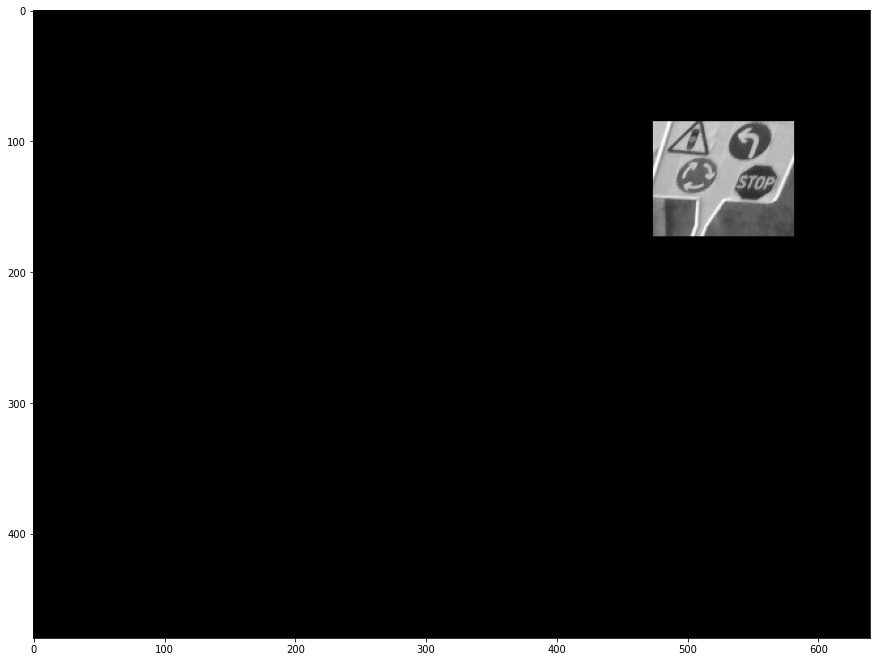

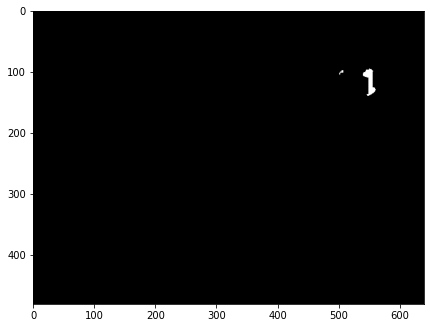

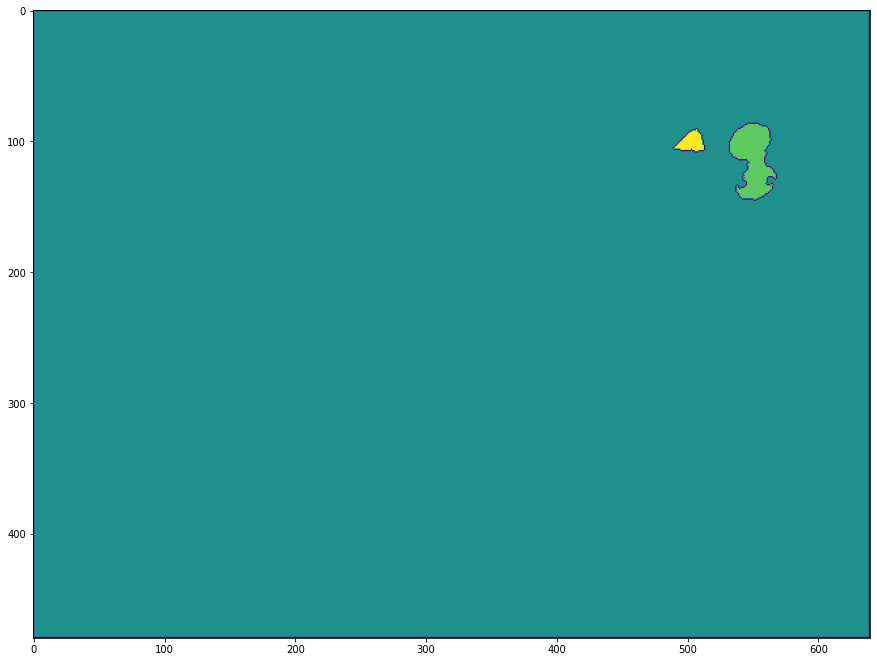

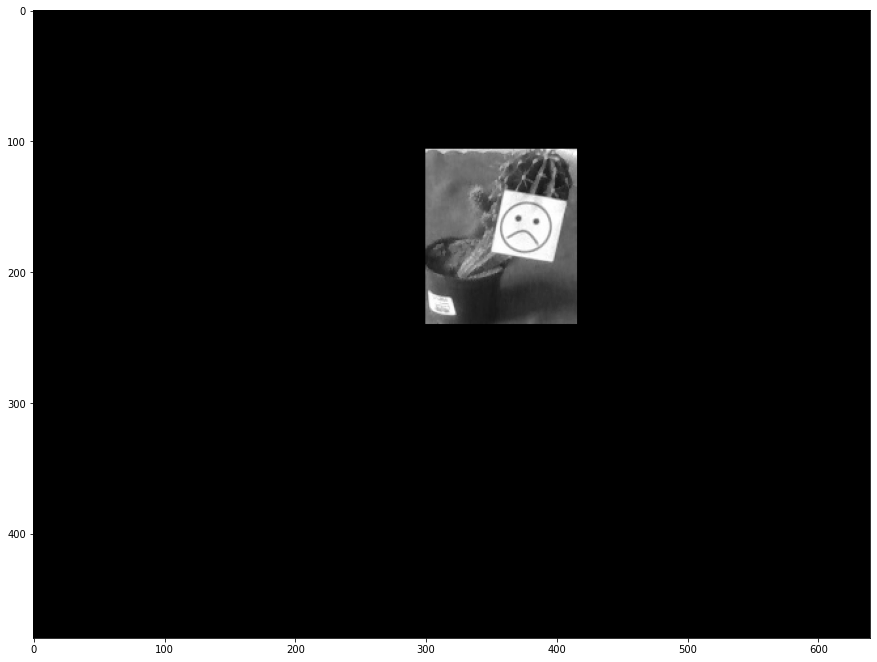

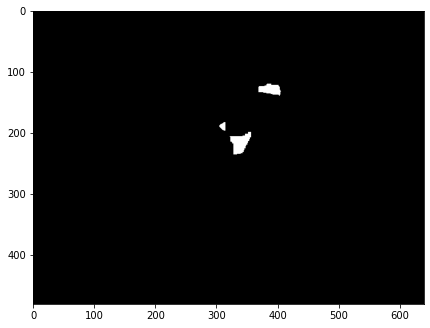

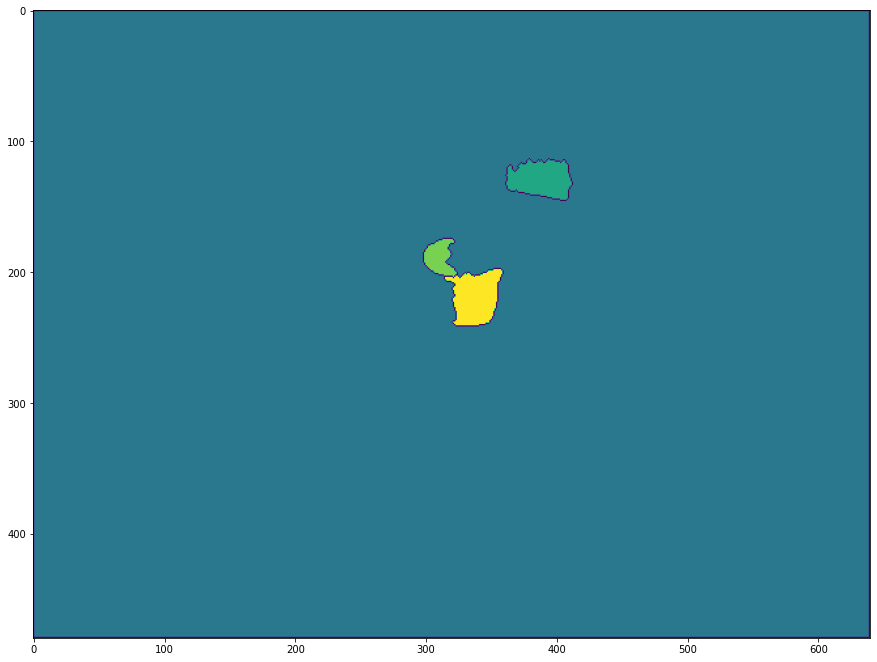

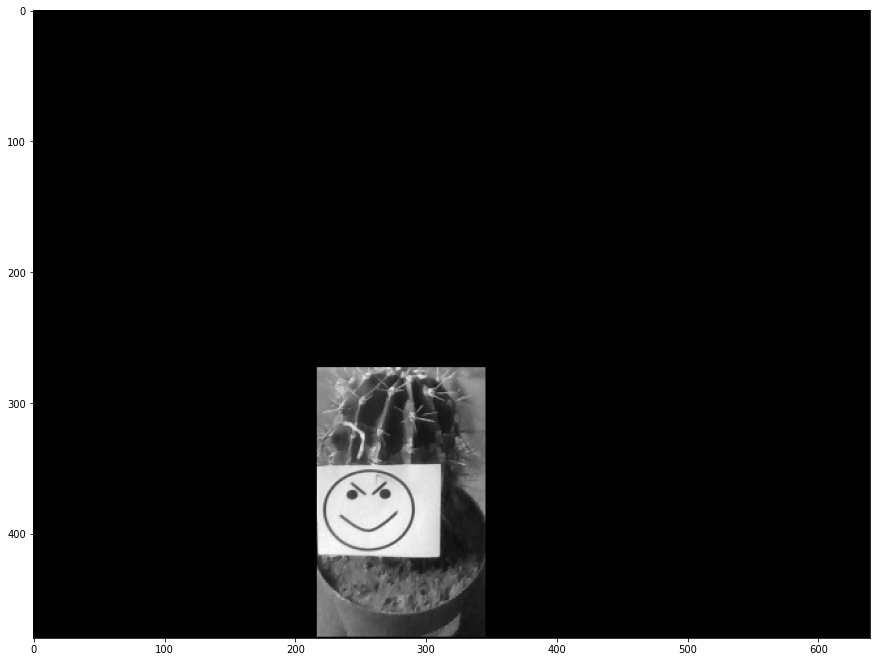

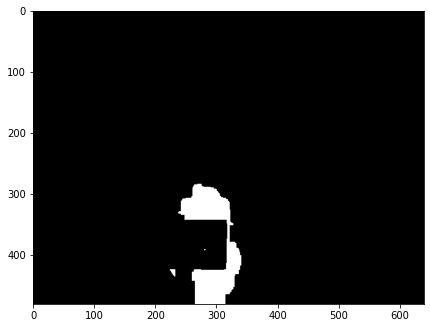

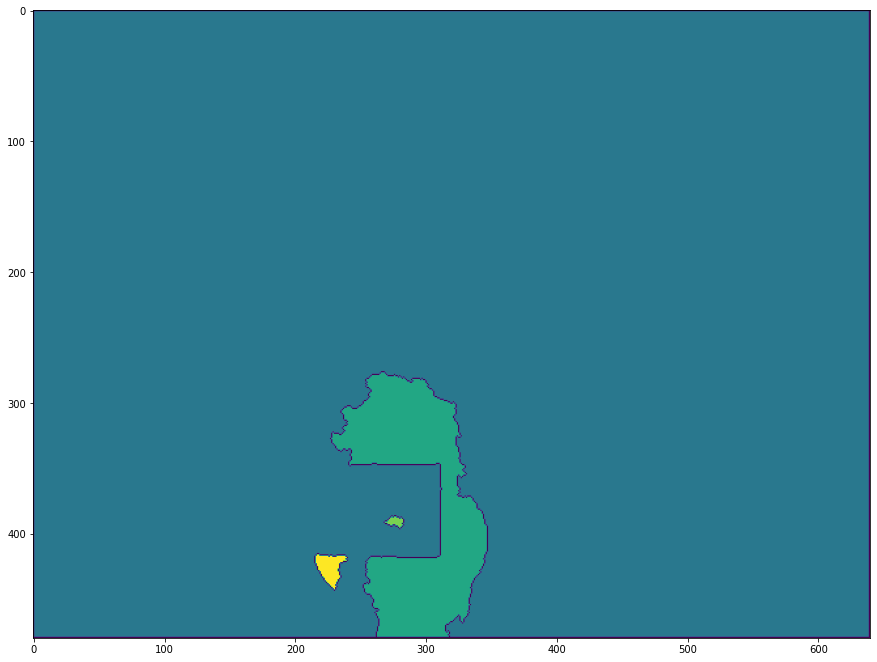

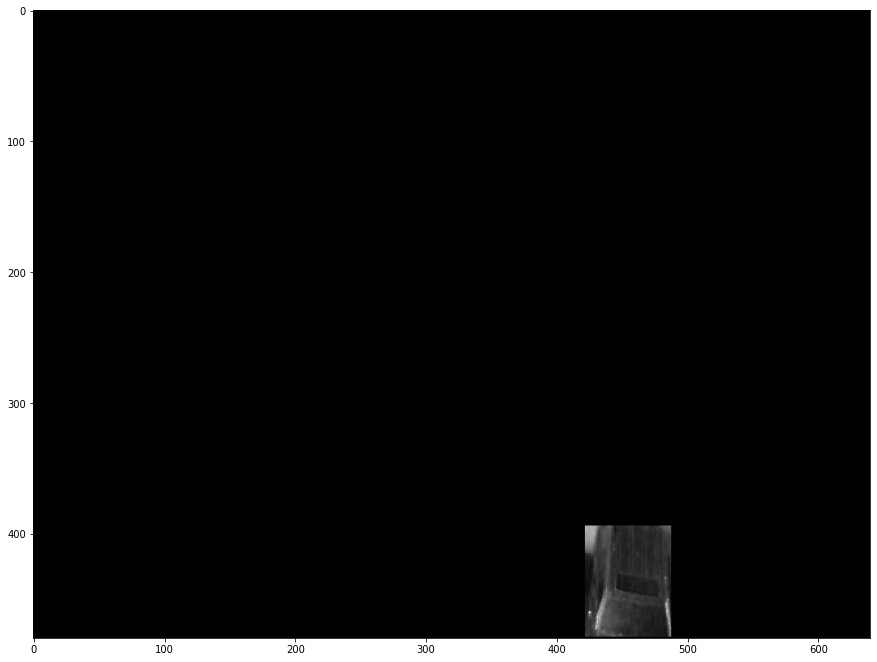

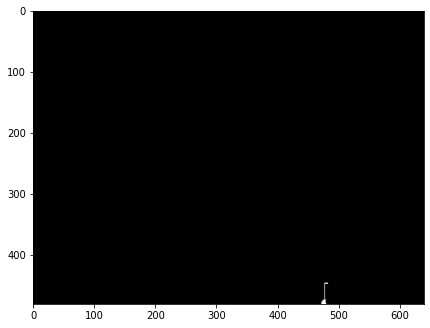

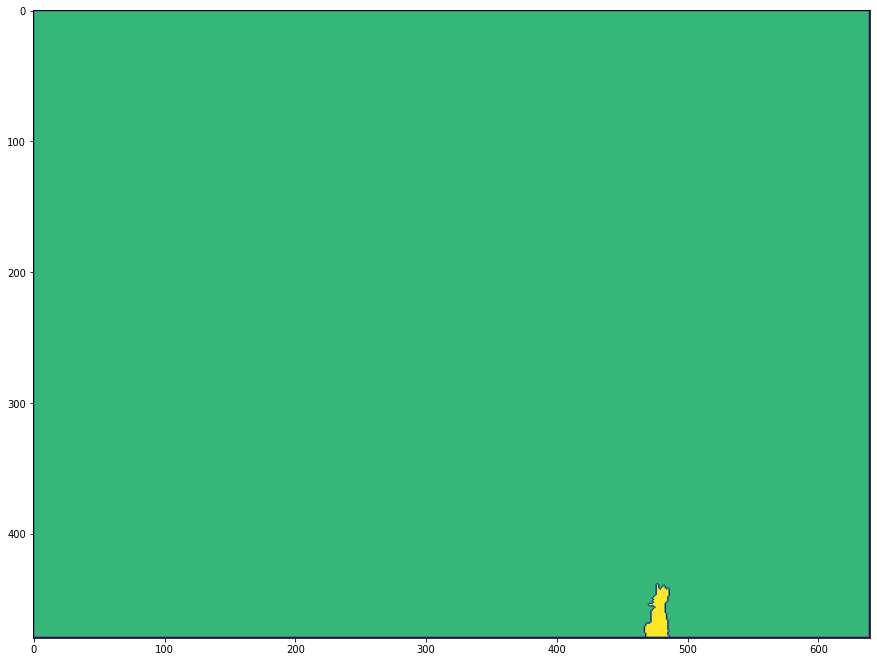

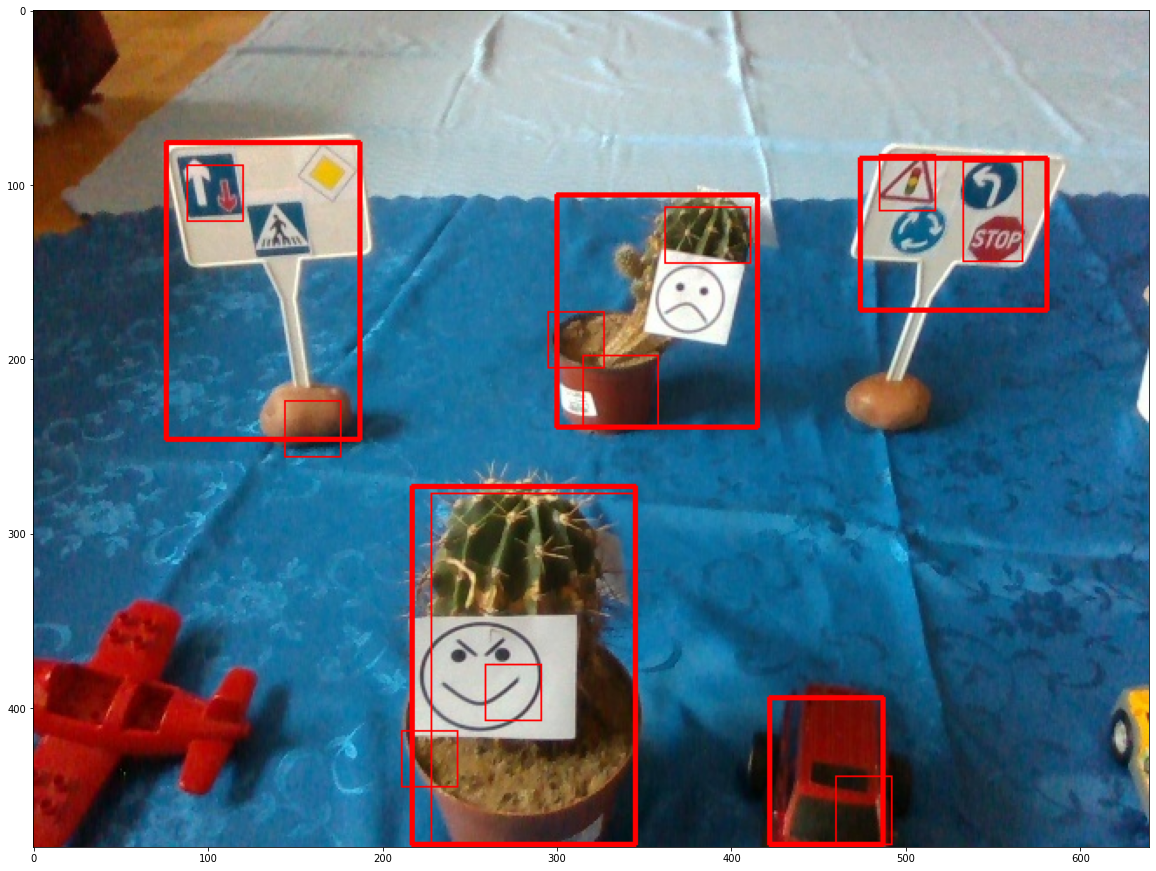

In [59]:
def minMaxLoc(img):
  Xmin = 999;
  Xmax = 0;
  Ymin = 999;
  Ymax = 0;
  
  for i in range(img.shape[0]):
    sor =img[i,:]
    mean=np.count_nonzero(sor)
    if ((Ymin == 999) & (mean > 0)):
      Ymin=i
    if ( mean > 0):
      Ymax = i

  for i in range(img.shape[1]):
    oszlop =img[:,i]
    mean=np.count_nonzero(oszlop)
    if ((Xmin == 999) & (mean > 0)):
      Xmin=i
    if ( mean > 0):
      Xmax = i

  return Xmin,Xmax,Ymin,Ymax

def watershed(edges,img,debug=False):
  kernel = np.ones((3,3),np.uint8)
  #widen edges to make them touch
  edges = cv2.dilate(edges, kernel,iterations=1)

  ret, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(thresh,cmap='gray')

  sure_fg = cv2.erode(thresh,kernel,iterations=1)
  sure_bg = cv2.dilate(thresh,kernel,iterations=1)

  # Uncertain region(borders)
  unknown = cv2.subtract(sure_bg,sure_fg)

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')

  # Label separate foreground pathes
  ret, markers = cv2.connectedComponents(sure_fg)
      
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(markers)
    
  # Runwatershed
  markers = cv2.watershed(img,markers)
  if debug:
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(markers)
    plt.subplot(1,2,2)
    plt.imshow(img)

  return markers

def makeBoundingBox(image):
  imagecopy = image.copy()
  imagecopy = cv2.cvtColor(imagecopy,cv2.COLOR_RGB2GRAY)
  imagecopy[imagecopy != 0] = 255;

  xmin,xmax,ymin,ymax = minMaxLoc(imagecopy)

  rect = (xmin,ymin,xmax-xmin,ymax-ymin)

  #rects = objFinder(imagecopy,100,10,10)

  #for i in range(len(rects)):
  #color = (255,255,0)
  #cv2.rectangle(imagecopy, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), color, 2)


  #plt.figure(figsize=(20,20))
  #plt.imshow(imagecopy,cmap='gray')
  return rect
  #contours,  = cv2.findContours(imgcopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#def findTrafficSigns(image,boundingboxes):

def cropper(image,boundingbox,depth_filter,debug=False):

  image2    = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2RGB)
  depthfilter = cv2.cvtColor(depth_filter,cv2.COLOR_BGR2GRAY)
  depthfilter[depthfilter>0]=1

  #kernel = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
  #image2 = cv2.filter2D(image2, -1, kernel)

  img_gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

  start = (int(boundingbox[0]),int(boundingbox[1]))
  end   = (int(boundingbox[0]+boundingbox[2]) , int(boundingbox[1]+boundingbox[3]))
  mask  = np.zeros(image.shape,dtype=np.uint8)
  mask  = cv2.rectangle(mask,start, end,(255,255,255),-1)
  mask  = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
  print(start[0])
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=mask).astype('uint8')

  if debug:
    plt.figure(figsize=(15,15))
    plt.imshow(img_gray,cmap='gray')
  ret, img_gray = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=mask).astype('uint8')
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=depthfilter).astype('uint8')

  kernel  = np.ones((3,3),np.uint8)
  img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel,iterations=7)

  sure_fg = cv2.erode(img_gray,kernel,iterations=5)
  sure_bg = cv2.dilate(img_gray,kernel,iterations=2)
  unknown = cv2.subtract(sure_bg,sure_fg)
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers+1
  markers[unknown==255] = 0
  markers = cv2.watershed(image2,markers)
  image2[markers == -1] = [255,0,0]

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')
  
  rects =[]

  for i in np.unique(markers):
    if i==0 | i==-1:
      continue
    tabla = np.where(markers == i,255,0).astype('uint8')
    Xmin,Xmax,Ymin,Ymax = minMaxLoc(tabla)
    xCenter = (Xmax+Xmin)/2
    yCenter = (Ymax+Ymin)/2
    w = Xmax-Xmin
    h = Ymax-Ymin
    if w<32:
      w=32
    if h<32:
      h=32
    x=int(xCenter-w/2)
    y=int(yCenter-h/2)
    if x<0:
      x=0
    if y<0:
      y=0
    rects.append((x,y,w,h))

  if debug:
    plt.figure(figsize=(15,15))
    plt.imshow(markers)

  return rects

def signFinder(imgBe,dFilter,folderName,picName,debug=False):
  for j,b in enumerate(brs):
    for i,r in enumerate(cropper(imgBe,b,dfilter,debug=debug)):
      if i==0:
        continue
      (x,y,w,h) = r
      cv2.rectangle(ret,(x,y),(x+w,y+h),(255,0,0),1)
      tabla = imgBe[y:y+h,x:x+w].copy()
      tabla = cv2.resize(tabla,(32,32),interpolation=cv2.INTER_CUBIC)
      cv2.imwrite("/content/HW/pics/"+folderName+"_"+picName+"_"+str(j)+"."+str(i)+"ts.jpg",tabla)

#************************************************************************ MAIN ************************************************************************

def depth_segmenter(inputImage, inputDepthImage, debug=False):
  # Read images
  img = inputImage.copy()
  depth = inputDepthImage.copy()

  sor =depth[0,:]
  legelsoAtlag=np.true_divide(sor.sum(),np.count_nonzero(sor))

  #hatsoMaszk=cv2.inRange(depth, legelsoAtlag*0.9, np.amax(depth))
  hatsoMaszk =  np.zeros((480,640)).astype("uint8")
  hatsoMaszk[depth<legelsoAtlag*0.6]=[1]

  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(hatsoMaszk,cmap='gray')

  # convert to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  lower_range = np.array([90,0,0])
  upper_range = np.array([120,255,220])

  maszk=cv2.inRange(img_hsv, lower_range, upper_range)

  maszkNegative = cv2.bitwise_not(maszk)
  
  if debug:
    out = cv2.bitwise_and(img_hsv,img_hsv,mask = maszkNegative)
    plotolni = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(20,20))
    plt.imshow(plotolni,cmap='gray')

  hue_channel = img_hsv[:,:,0]
  avg_hue = np.average(hue_channel)
  asdasd, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  maszkDilation = cv2.erode(hue_channel_segment,kernel,iterations = 2)

  maszkDilation = cv2.bitwise_not(maszkDilation)
  maszkNegative = cv2.bitwise_and(maszkDilation,maszkDilation,mask = maszkNegative)
  maszkNegative = cv2.bitwise_and(maszkNegative,maszkNegative,mask = hatsoMaszk)
  
  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(maszkNegative,cmap='gray')

  # calculate foreground
  for i in range(depth.shape[0]):
    sor =depth[i,:]
    mean=np.true_divide(sor.sum(),np.count_nonzero(sor))
    sor[sor>mean-20]=0

  # for some reason doesn't work without this
 # depth2[depth==0]=0
 # img_rgb = np.where(depth2 != 0, img_rgb, [0,0,0])

  # Figure with subplots
  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb) 
    plt.subplot(1,2,2)
    plt.imshow(depth,cmap='gray')

  # convert to uint8 from uint16
  cv2.normalize(depth, depth, 0, 255, cv2.NORM_MINMAX)
  depth=depth.astype('uint8')
  depth_8 = cv2.cvtColor(depth, cv2.COLOR_GRAY2BGR)

  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(depth_8) 

  kernel = np.ones((3,3),np.uint8)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_OPEN,  kernel, iterations = 3)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  Atlag=np.true_divide(sor.sum(),np.count_nonzero(sor))
  depth_8[depth_8 > Atlag*2.2]=[0]

  depth_out = depth_8

  depth_8 = cv2.bitwise_and(depth_8,depth_8,mask = maszkNegative)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  if debug: 
    plt.subplot(1,2,2)
    plt.imshow(depth_8,cmap='gray')

  # get edges
  edges = cv2.Canny(depth_8,50,120)
  markers = watershed(edges,img,debug=debug)

  ####
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  boundingRects=[]
  for i in np.unique(markers):
    if i<2 :
      continue

    imgcopy=img.copy()
    imgcopy[markers!=i]=[0,0,0]  
    xmin,xmax,ymin,ymax = minMaxLoc(imgcopy)

    if ((xmax-xmin > 500) & (ymax-ymin > 350)):
      continue
    
    imgcopy = cv2.bitwise_and(imgcopy,imgcopy,mask = maszkNegative)

    if np.count_nonzero(imgcopy)<3600:
      continue

    #if np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0]))<4200:
    #  continue
    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(imgcopy)
      print(str(i)+":"+str(np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0])))+"........\t"+str(np.count_nonzero(imgcopy))+"minmax:"+str(xmin)+" "+str(xmax)+" "+str(ymin)+" "+str(ymax))
  
    boundingRects.append(makeBoundingBox(imgcopy))

  for i in range(len(boundingRects)):
    color = (255,0,0)
    start = (int(boundingRects[i][0]),int(boundingRects[i][1]))
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3]))
    img2 = cv2.rectangle(img2, start, end, (255,0,0), 2)

  return img2, boundingRects, depth_out


folderName="g3"
picName="356"

imgBe   = cv2.imread("../HW/"+folderName+"/rgb/"+picName+".jpg")
depthBe = cv2.imread("../HW/"+folderName+"/depth/"+picName+".png", -1)

ret,brs,dfilter = depth_segmenter(imgBe, depthBe, debug=False)

signFinder(imgBe,dfilter,folderName,picName,debug=True)

#cropper(imgBe,brs[0],dfilter)
#cropper(imgBe,brs[3],dfilter)

plt.figure(figsize=(20,20))
plt.imshow(ret,cmap='gray')

171


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:255: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:256: RuntimeWarning: invalid value encountered in greater


295
394
213
33
234
307
1
381
60
145
411
270
186
326
258
89
199
123
159
147
257
126
329
1
359
205
286
185
415
108
47
236
383
313
64
136
376
189
441
307
278
1
292
208
356
409
420
77
327
340
225
65
250
153
210
38
62
297
1
270
134
152
190
95
78
159
116
250
229


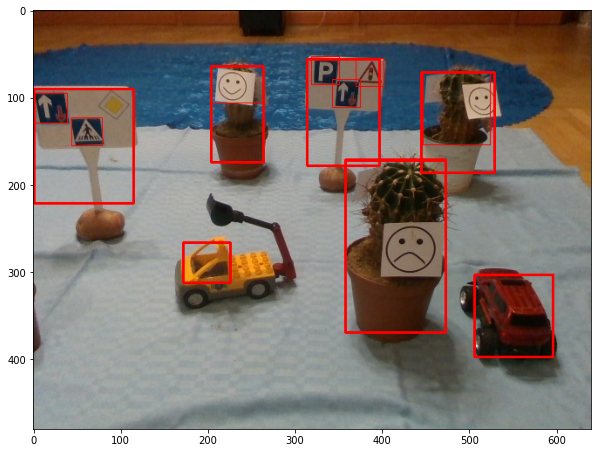

In [28]:
import glob
i=0
foldernames=["g1","g2","g3","g4"]
for folder in foldernames:
  for file in glob.glob("../HW/"+folder+"/rgb/*.*"):
    i=i+1
    imgBGR = cv2.imread(file)
    asd = file.split("/rgb/")
    asd.append(asd[1].split(".jpg"))

    depfile = cv2.imread(asd[0]+"/depth/"+asd[2][0]+".png",-1)
    ret,brs,dfilter = depth_segmenter(imgBGR, depfile, debug=False)
    signFinder(imgBGR,dfilter,folder,asd[2][0])

    print(asd[2][0])
    if asd[2][0]=="123":
      plt.figure(figsize=(10,10))
      plt.imshow(ret,cmap='gray')
    #cv2.imwrite(("../HW/out/g4/"+str(i)+".jpg"),cv2.cvtColor(retRGB, cv2.COLOR_RGB2BGR))

In [29]:
!zip -r pics.zip /content/HW/pics 

  adding: content/HW/pics/ (stored 0%)
  adding: content/HW/pics/g3_65_2.3ts.jpg (deflated 15%)
  adding: content/HW/pics/g1_159_0.3ts.jpg (deflated 14%)
  adding: content/HW/pics/g1_394_1.1ts.jpg (deflated 15%)
  adding: content/HW/pics/g1_307_3.2ts.jpg (deflated 15%)
  adding: content/HW/pics/g3_189_1.1ts.jpg (deflated 13%)
  adding: content/HW/pics/g4_229_2.1ts.jpg (deflated 14%)
  adding: content/HW/pics/g2_185_1.3ts.jpg (deflated 15%)
  adding: content/HW/pics/g3_278_4.2ts.jpg (deflated 12%)
  adding: content/HW/pics/g1_33_1.2ts.jpg (deflated 15%)
  adding: content/HW/pics/g2_64_1.4ts.jpg (deflated 13%)
  adding: content/HW/pics/g2_47_2.3ts.jpg (deflated 13%)
  adding: content/HW/pics/g1_234_2.3ts.jpg (deflated 14%)
  adding: content/HW/pics/g1_258_3.1ts.jpg (deflated 15%)
  adding: content/HW/pics/g3_356_1.2ts.jpg (deflated 13%)
  adding: content/HW/pics/g1_381_4.1ts.jpg (deflated 13%)
  adding: content/HW/pics/g1_1_7.1ts.jpg (deflated 14%)
  adding: content/HW/pics/g1_186_0.1ts.